In [43]:
from os.path import dirname, join
import geopandas as gpd
import pandas as pd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np


In [44]:
#Reading population data
sections_population=pd.read_excel("data/population/hti_adminboundaries_tabulardata.xlsx",sheet_name="hti_pop2019_adm3",index_col=14)
communes_population=pd.read_excel("data/population/hti_adminboundaries_tabulardata.xlsx",sheet_name="hti_pop2019_adm2", index_col=8)
departements_population=pd.read_excel("data/population/hti_adminboundaries_tabulardata.xlsx",sheet_name="hti_pop2019_adm1", index_col=4)

In [45]:
sections_population.head()

,id_Section,No_section,adm0code,adm0_en,adm0_fr,adm0_ht,adm1code,adm1_en,adm1_fr,adm1_ht,adm2code,adm2_en,adm2_fr,adm2_ht,adm3_en,adm3_fr,IHSI_UNFPA_2019,IHSI_UNFPA_2019_female,IHSI_UNFPA_2019_male
adm3code,,,,,,,,,,,,,,,,,,,
HT0111-01,111-01,1,HT,Haiti,Haïti,Ayiti,HT01,West,Ouest,Lwès,HT0111,Port-au-Prince,Port-au-Prince,,1re Section Turgeau,1re Section Turgeau,660741.475769,350627,310115
HT0111-02,111-02,2,HT,Haiti,Haïti,Ayiti,HT01,West,Ouest,Lwès,HT0111,Port-au-Prince,Port-au-Prince,,2e Section Morne l'Hopital,2e Section Morne l'Hopital,199766.395065,105735,94031
HT0111-03,111-03,3,HT,Haiti,Haïti,Ayiti,HT01,West,Ouest,Lwès,HT0111,Port-au-Prince,Port-au-Prince,,3e Section Martissant,3e Section Martissant,367032.456736,191991,175042
HT0112-01,112-01,1,HT,Haiti,Haïti,Ayiti,HT01,West,Ouest,Lwès,HT0112,Delmas,Delmas,,1re Section St Martin,1re Section St Martin,491434.226379,258526,232908
HT0113-01,113-01,1,HT,Haiti,Haïti,Ayiti,HT01,West,Ouest,Lwès,HT0113,Carrefour,Carrefour,,1re Section Morne Chandelle,1re Section Morne Chandelle,121.845187,55,67


In [46]:
communes_population.head()

,adm0code,adm0_en,adm0_fr,adm0_ht,adm1code,adm1_en,adm1_fr,adm1_ht,adm2_en,adm2_fr,adm2_ht,IHSI_UNFPA_2019,IHSI_UNFPA_2019_female,IHSI_UNFPA_2019_male
adm2code,,,,,,,,,,,,,,
HT0111,HT,Haiti,Haïti,Ayiti,HT01,West,Ouest,Lwès,Port-au-Prince,Port-au-Prince,,1.227540e+06,648353,579188
HT0112,HT,Haiti,Haïti,Ayiti,HT01,West,Ouest,Lwès,Delmas,Delmas,,4.914342e+05,258526,232908
HT0113,HT,Haiti,Haïti,Ayiti,HT01,West,Ouest,Lwès,Carrefour,Carrefour,,6.357646e+05,333500,302263
HT0114,HT,Haiti,Haïti,Ayiti,HT01,West,Ouest,Lwès,Petion-Ville,Pétion-Ville,,4.685251e+05,241407,227118
HT0115,HT,Haiti,Haïti,Ayiti,HT01,West,Ouest,Lwès,Kenscoff,Kenscoff,,7.140848e+04,35608,35800


In [47]:
departements_population.head()

,adm0code,adm0_en,adm0_fr,adm0_ht,adm1_en,adm1_fr,adm1_ht,IHSI_UNFPA_2019,IHSI_UNFPA_2019_female,IHSI_UNFPA_2019_male
adm1code,,,,,,,,,,
HT01,HT,Haiti,Haïti,Ayiti,West,Ouest,Lwès,5.010206e+06,2587360,2422846
HT02,HT,Haiti,Haïti,Ayiti,South-East,Sud-Est,Sidès,8.939007e+05,448111,445790
HT03,HT,Haiti,Haïti,Ayiti,North,Nord,Nò,1.159762e+06,589825,569932
HT04,HT,Haiti,Haïti,Ayiti,North-East,Nord-Est,Nòdès,4.444631e+05,221501,222966
HT05,HT,Haiti,Haïti,Ayiti,Artibonite,Artibonite,Latibonit,2.047153e+06,1034065,1013085


In [48]:
#Select population data
pop_dep=departements_population[["IHSI_UNFPA_2019","IHSI_UNFPA_2019_female","IHSI_UNFPA_2019_male"]]
pop_com=communes_population[["IHSI_UNFPA_2019","IHSI_UNFPA_2019_female","IHSI_UNFPA_2019_male"]]
pop_sec=sections_population[["IHSI_UNFPA_2019","IHSI_UNFPA_2019_female","IHSI_UNFPA_2019_male"]]

In [49]:
display(pop_dep.head())
display(pop_com.head())
display(pop_sec.head())

,IHSI_UNFPA_2019,IHSI_UNFPA_2019_female,IHSI_UNFPA_2019_male
adm1code,,,
HT01,5.010206e+06,2587360,2422846
HT02,8.939007e+05,448111,445790
HT03,1.159762e+06,589825,569932
HT04,4.444631e+05,221501,222966
HT05,2.047153e+06,1034065,1013085


,IHSI_UNFPA_2019,IHSI_UNFPA_2019_female,IHSI_UNFPA_2019_male
adm2code,,,
HT0111,1.227540e+06,648353,579188
HT0112,4.914342e+05,258526,232908
HT0113,6.357646e+05,333500,302263
HT0114,4.685251e+05,241407,227118
HT0115,7.140848e+04,35608,35800


,IHSI_UNFPA_2019,IHSI_UNFPA_2019_female,IHSI_UNFPA_2019_male
adm3code,,,
HT0111-01,660741.475769,350627,310115
HT0111-02,199766.395065,105735,94031
HT0111-03,367032.456736,191991,175042
HT0112-01,491434.226379,258526,232908
HT0113-01,121.845187,55,67


In [50]:
#read geodata file
sectionsgpd=gpd.read_file("data/adm/hti_admbnda_adm3_cnigs_20181129.shp")
communesgpd=gpd.read_file("data/adm/hti_admbnda_adm2_cnigs_20181129.shp")
departementsgpd=gpd.read_file("data/adm/hti_admbnda_adm1_cnigs_20181129.shp")

In [51]:
sectionsgpd.set_index("ADM3_PCODE", inplace=True)
communesgpd.set_index("ADM2_PCODE", inplace=True)
departementsgpd.set_index("ADM1_PCODE", inplace=True)
display(sectionsgpd.head())

,Shape_Leng,Shape_Area,ADM3_EN,ADM3_FR,ADM3_HT,ADM3_REF,ADM3ALT1EN,ADM3ALT2EN,ADM3ALT1FR,ADM3ALT2FR,...,ADM1_HT,ADM1_PCODE,ADM0_EN,ADM0_FR,ADM0_HT,ADM0_PCODE,date,validOn,validTo,geometry
ADM3_PCODE,,,,,,,,,,,,,,,,,,,,,
HT0131-10,0.548180,0.009233,10e Section des Orangers,10e Section des Orangers,None,None,None,None,None,None,...,Lwès,HT01,Haiti,Haïti,Ayiti,HT,2017-09-06,2018-11-29,None,POLYGON ((-72.29680323599996 18.81696379200002...
HT0122-10,0.277353,0.001740,10e Section des Palmes,10e Section des Palmes,None,None,None,None,None,None,...,Lwès,HT01,Haiti,Haïti,Ayiti,HT,2017-09-06,2018-11-29,None,POLYGON ((-72.86124560499997 18.35838600300008...
HT0121-10,0.274402,0.003068,10e Section Fond d'Oie,10e Section Fond d'Oie,None,10e Section Fond dOie,None,None,None,None,...,Lwès,HT01,Haiti,Haïti,Ayiti,HT,2017-09-06,2018-11-29,None,POLYGON ((-72.52483078199998 18.40687415700006...
HT0731-10,0.333814,0.003560,10e Section Guirand,10e Section Guirand,None,None,None,None,None,None,...,Sid,HT07,Haiti,Haïti,Ayiti,HT,2017-09-06,2018-11-29,None,POLYGON ((-73.13994324699996 18.36475433600003...
HT0211-10,0.331440,0.003103,10e Section La Vanneau,10e Section La Vanneau,None,None,None,None,None,None,...,Sidès,HT02,Haiti,Haïti,Ayiti,HT,2017-09-06,2018-11-29,None,POLYGON ((-72.62839603899994 18.29667571500005...


In [52]:
#concat data from population with administrative
sec_pop=gpd.GeoDataFrame(pd.concat([pop_sec,sectionsgpd], axis=1, join="inner"))
com_pop=gpd.GeoDataFrame(pd.concat([pop_com,communesgpd], axis=1, join="inner"))
dep_pop=gpd.GeoDataFrame(pd.concat([pop_dep,departementsgpd], axis=1, join="inner"))
display(sec_pop.shape)
display(com_pop.shape)
display(dep_pop.shape)

(570, 31)

(140, 27)

(10, 23)

In [53]:
#reading facilities
facilities=pd.read_excel("data/health/haiti-healthsites_hdx.xlsx", skiprows=[1])
facilities.head()

,Adm1code,adm1_fr,adm1_ht,adm2code,adm2_en,adm2_fr,adm3code,adm3_en,adm3_fr,Institution name,Catégorie,Institution_Type,Institution_Code,LatDD,LongDD
0,HT01,Ouest,Lwès,HT0111,Port-au-Prince,Port-au-Prince,HT0111-01,1re Section Turgeau,1re Section Turgeau,Centre de Santé Snelak,Dispensaire,Privé à but lucratif,111607.0,18.525922,-72.335068
1,HT01,Ouest,Lwès,HT0111,Port-au-Prince,Port-au-Prince,HT0111-01,1re Section Turgeau,1re Section Turgeau,Centre de psychiatrie Mars & Kline,HCR,Public,111616.0,18.525922,-72.335068
2,HT01,Ouest,Lwès,HT0111,Port-au-Prince,Port-au-Prince,HT0111-01,1re Section Turgeau,1re Section Turgeau,Hôpital St. François de Salle,CSL,Privé à but lucratif,111618.0,18.537777,-72.344001
3,HT01,Ouest,Lwès,HT0111,Port-au-Prince,Port-au-Prince,HT0111-01,1re Section Turgeau,1re Section Turgeau,CSL SODEC,CAL,Privé à but lucratif,111619.0,18.525922,-72.335068
4,HT01,Ouest,Lwès,HT0111,Port-au-Prince,Port-au-Prince,HT0111-01,1re Section Turgeau,1re Section Turgeau,PROFAMIL 2,CSL,Privé à but non lucratif,111620.0,18.525922,-72.335068


In [54]:
#Delete facilities without Institution name
facilities.dropna(subset=["Institution name"],inplace=True)
#showing shape 
display("facilities shape : ",facilities.shape)
#split facilities into two datasets, those with GPS and...
facilities_gps=facilities.dropna(subset=["LatDD", "LongDD"])
display("facilities with GPS shape :", facilities_gps.shape)
facilities_without_gps=facilities[facilities["LatDD"].isna()]
display("facilities without GPS shape :", facilities_without_gps.shape)

'facilities shape : '

(730, 15)

'facilities with GPS shape :'

(480, 15)

'facilities without GPS shape :'

(250, 15)

In [55]:
#Convert facilities with GPS coordinates to GeoDataFrame
geometry = [Point(xy) for xy in zip(facilities_gps["LongDD"], facilities_gps["LatDD"])]
crs = {'init': 'epsg:4326'}
facilitiesgpd = GeoDataFrame(facilities_gps, crs=crs, geometry=geometry)


In [56]:
#Get code for Departements, 
from geopandas.tools import sjoin
departementsgpd.reset_index(inplace=True)
facilitiesgps_per_dep = sjoin(facilitiesgpd, departementsgpd, how='left') 
index_to_keep_dep=['ADM1_PCODE','Institution name', 'Catégorie','Institution_Type', 'Institution_Code', 'geometry']
facilitiesgps_per_dep =facilitiesgps_per_dep[index_to_keep_dep]

#Communes
communesgpd.reset_index(inplace=True)
facilitiesgps_per_com = sjoin(facilitiesgpd, communesgpd, how='left') 
index_to_keep_com=['ADM2_PCODE','Institution name', 'Catégorie','Institution_Type', 'Institution_Code', 'geometry']
facilitiesgps_per_com =facilitiesgps_per_com[index_to_keep_com]

#Sections communales
sectionsgpd.reset_index(inplace=True)
facilitiesgps_per_section = sjoin(facilitiesgpd, sectionsgpd, how='left') 
index_to_keep_sect=['ADM3_PCODE','Institution name', 'Catégorie','Institution_Type', 'Institution_Code', 'geometry']
facilitiesgps_per_section =facilitiesgps_per_section[index_to_keep_sect]
#set index
facilitiesgps_per_dep.set_index(['ADM1_PCODE'], inplace=True)
facilitiesgps_per_com.set_index(['ADM2_PCODE'], inplace=True)
facilitiesgps_per_section.set_index(['ADM3_PCODE'], inplace=True)
#display head
display(facilitiesgps_per_dep.head(5))
display(facilitiesgps_per_com.head(5))
display(facilitiesgps_per_section.head(5))

,Institution name,Catégorie,Institution_Type,Institution_Code,geometry
ADM1_PCODE,,,,,
HT01,Centre de Santé Snelak,Dispensaire,Privé à but lucratif,111607.0,POINT (-72.33506800000001 18.525922)
HT01,Centre de psychiatrie Mars & Kline,HCR,Public,111616.0,POINT (-72.33506800000001 18.525922)
HT01,Hôpital St. François de Salle,CSL,Privé à but lucratif,111618.0,POINT (-72.34400100000001 18.537777)
HT01,CSL SODEC,CAL,Privé à but lucratif,111619.0,POINT (-72.33506800000001 18.525922)
HT01,PROFAMIL 2,CSL,Privé à but non lucratif,111620.0,POINT (-72.33506800000001 18.525922)


,Institution name,Catégorie,Institution_Type,Institution_Code,geometry
ADM2_PCODE,,,,,
HT0111,Centre de Santé Snelak,Dispensaire,Privé à but lucratif,111607.0,POINT (-72.33506800000001 18.525922)
HT0111,Centre de psychiatrie Mars & Kline,HCR,Public,111616.0,POINT (-72.33506800000001 18.525922)
HT0111,Hôpital St. François de Salle,CSL,Privé à but lucratif,111618.0,POINT (-72.34400100000001 18.537777)
HT0111,CSL SODEC,CAL,Privé à but lucratif,111619.0,POINT (-72.33506800000001 18.525922)
HT0111,PROFAMIL 2,CSL,Privé à but non lucratif,111620.0,POINT (-72.33506800000001 18.525922)


,Institution name,Catégorie,Institution_Type,Institution_Code,geometry
ADM3_PCODE,,,,,
HT0111-02,Centre de Santé Snelak,Dispensaire,Privé à but lucratif,111607.0,POINT (-72.33506800000001 18.525922)
HT0111-02,Centre de psychiatrie Mars & Kline,HCR,Public,111616.0,POINT (-72.33506800000001 18.525922)
HT0111-01,Hôpital St. François de Salle,CSL,Privé à but lucratif,111618.0,POINT (-72.34400100000001 18.537777)
HT0111-02,CSL SODEC,CAL,Privé à but lucratif,111619.0,POINT (-72.33506800000001 18.525922)
HT0111-02,PROFAMIL 2,CSL,Privé à but non lucratif,111620.0,POINT (-72.33506800000001 18.525922)


In [57]:
# working with facilities without GPS
i=['Adm1code','Institution name', 'Catégorie','Institution_Type', 'Institution_Code']
j=['adm2code','Institution name', 'Catégorie','Institution_Type', 'Institution_Code']
k=['adm3code','Institution name', 'Catégorie','Institution_Type', 'Institution_Code']
facilities_without_gps_dep=facilities_without_gps[i]
facilities_without_gps_com=facilities_without_gps[j]
facilities_without_gps_sec=facilities_without_gps[k]
#set index
facilities_without_gps_dep.set_index(['Adm1code'], inplace=True)
facilities_without_gps_com.set_index(['adm2code'], inplace=True)
facilities_without_gps_sec.set_index(['adm3code'], inplace=True)
#display head
display(facilities_without_gps_dep.head())
display(facilities_without_gps_com.head())
display(facilities_without_gps_sec.head())

,Institution name,Catégorie,Institution_Type,Institution_Code
Adm1code,,,,
HT01,Centre médico-social/FHSM,CSL,Public,111831.0
HT01,CEMEAH,CSL,Privé à but lucratif,111650.0
HT01,Mission de Charité Cœur Immaculé,CAL,Mixte,111661.0
HT01,CS Evangélique de Siloé,CSL,Privé à but lucratif,111662.0
HT01,Centre Médico-Social de P-au-P,CSL,Privé à but non lucratif,111663.0


,Institution name,Catégorie,Institution_Type,Institution_Code
adm2code,,,,
HT0111,Centre médico-social/FHSM,CSL,Public,111831.0
HT0111,CEMEAH,CSL,Privé à but lucratif,111650.0
HT0111,Mission de Charité Cœur Immaculé,CAL,Mixte,111661.0
HT0111,CS Evangélique de Siloé,CSL,Privé à but lucratif,111662.0
HT0111,Centre Médico-Social de P-au-P,CSL,Privé à but non lucratif,111663.0


,Institution name,Catégorie,Institution_Type,Institution_Code
adm3code,,,,
HT0111-01,Centre médico-social/FHSM,CSL,Public,111831.0
HT0111-01,CEMEAH,CSL,Privé à but lucratif,111650.0
HT0111-01,Mission de Charité Cœur Immaculé,CAL,Mixte,111661.0
HT0111-01,CS Evangélique de Siloé,CSL,Privé à but lucratif,111662.0
HT0111-01,Centre Médico-Social de P-au-P,CSL,Privé à but non lucratif,111663.0


In [58]:
#concat facilities with GPS and without GPS
departement_facilities=GeoDataFrame(pd.concat([facilitiesgps_per_dep,facilities_without_gps_dep]))
commune_facilities=GeoDataFrame(pd.concat([facilitiesgps_per_com,facilities_without_gps_com]))
section_facilities=GeoDataFrame(pd.concat([facilitiesgps_per_section,facilities_without_gps_sec]))
display(departement_facilities.shape)
display(commune_facilities.shape)
display(section_facilities.shape)
section_facilities.head()

(730, 5)

(730, 5)

(730, 5)

,Catégorie,Institution name,Institution_Code,Institution_Type,geometry
HT0111-02,Dispensaire,Centre de Santé Snelak,111607.0,Privé à but lucratif,POINT (-72.33506800000001 18.525922)
HT0111-02,HCR,Centre de psychiatrie Mars & Kline,111616.0,Public,POINT (-72.33506800000001 18.525922)
HT0111-01,CSL,Hôpital St. François de Salle,111618.0,Privé à but lucratif,POINT (-72.34400100000001 18.537777)
HT0111-02,CAL,CSL SODEC,111619.0,Privé à but lucratif,POINT (-72.33506800000001 18.525922)
HT0111-02,CSL,PROFAMIL 2,111620.0,Privé à but non lucratif,POINT (-72.33506800000001 18.525922)


In [59]:
#fillna value for category and institution type
value={"Catégorie":"non disponible", "Institution_Type":"non disponible" }
departement_facilities=departement_facilities.fillna(value=value)
departement_facilities["Institution_Type"].count()

730

In [60]:
#create crosstab with category and instituion type by departement, commune and section com
dep_cat=pd.crosstab(index=departement_facilities.index, columns=departement_facilities['Catégorie'], values=departement_facilities['Catégorie'], aggfunc='count')
dep_type=pd.crosstab(index=departement_facilities.index, columns=departement_facilities['Institution_Type'], values=departement_facilities['Institution_Type'], aggfunc='count')
#concat cat and type by departement
depcatype=pd.concat([dep_cat,dep_type], axis=1)

com_cat=pd.crosstab(index=commune_facilities.index,columns=commune_facilities['Catégorie'],values=commune_facilities['Catégorie'], aggfunc='count')
com_type=pd.crosstab(index=commune_facilities.index,columns=commune_facilities['Institution_Type'],values=commune_facilities['Institution_Type'], aggfunc='count')
#concat cat and type by commune
comcatype=pd.concat([com_cat,com_type], axis=1)

sec_cat=pd.crosstab(index=section_facilities.index,columns=section_facilities['Catégorie'],values=section_facilities['Catégorie'], aggfunc='count')
sec_type=pd.crosstab(index=section_facilities.index,columns=section_facilities['Institution_Type'],values=section_facilities['Institution_Type'], aggfunc='count')
#concat cat and type by sec
secatype=pd.concat([sec_cat,sec_type], axis=1)

In [61]:
#concat with administrative and population data
v0_dep_data=GeoDataFrame(pd.concat([dep_pop,depcatype],axis=1))
v0_com_data=GeoDataFrame(pd.concat([com_pop,comcatype],axis=1))
v0_sec_dat=GeoDataFrame(pd.concat([sec_pop,secatype],axis=1))

In [62]:
display(v0_dep_data.shape)
display(v0_com_data.shape)
display(v0_sec_dat.shape)

(10, 38)

(140, 42)

(570, 46)

In [63]:
#export in shapefile
#v0_dep_data.to_file("data/combined/v0_dep_data.shp", encoding='utf-8')
#v0_com_data.to_file("data/combined/v0_com_data,shp", encoding='utf-8')
#v0_sec_dat.to_file("data/combined/v0_sec_data.shp", encoding='utf-8')

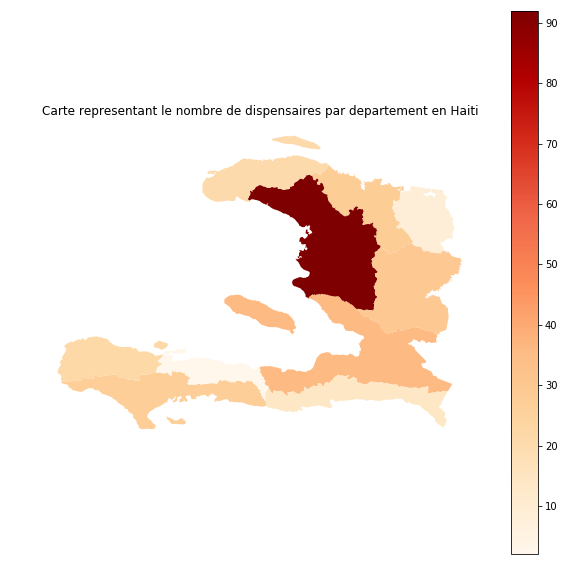

In [76]:
fig, ax = plt.subplots(1, 1,figsize=(10,10))
v0_dep_data.plot(column="Dispensaire", ax=ax,cmap='OrRd', legend=True)
plt.title("Carte representant le nombre de dispensaires par departement en Haiti")
plt.axis('off')
plt.show()